In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("ETH15M.csv")
df.head()

,dateTime,open,high,low,close,volume
0,2019-11-27 14:15:00,148.00,148.08,146.80,147.38,2693.24
1,2019-11-27 14:30:00,147.37,147.66,147.15,147.28,2355.46
2,2019-11-27 14:45:00,147.48,147.66,146.90,147.65,2584.54
3,2019-11-27 15:00:00,147.61,147.98,147.32,147.95,1876.29
4,2019-11-27 15:15:00,147.97,148.71,147.79,148.69,2407.68


In [3]:
df.tail()

,dateTime,open,high,low,close,volume
80582,2022-03-15 23:45:00,2624.76,2627.84,2615.49,2617.29,7743.638
80583,2022-03-16 00:00:00,2617.29,2629.00,2614.00,2622.35,18667.741
80584,2022-03-16 00:15:00,2622.34,2622.53,2602.06,2616.35,23557.250
80585,2022-03-16 00:30:00,2616.36,2621.26,2612.56,2613.79,11413.161
80586,2022-03-16 00:45:00,2613.79,2615.77,2609.23,2610.80,9660.115


In [4]:
df.duplicated().sum()

0

In [5]:
data = pd.read_csv("ETH15M.csv", parse_dates=['dateTime'], index_col='dateTime')

In [6]:
X = np.arange(len(data)).reshape(-1, 1)  # Independent variable (index as time progression)
y = data['close'].values  # Dependent variable (Ethereum closing prices)

In [7]:
# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X, y)
y_linear_predict = regressor.predict(X)

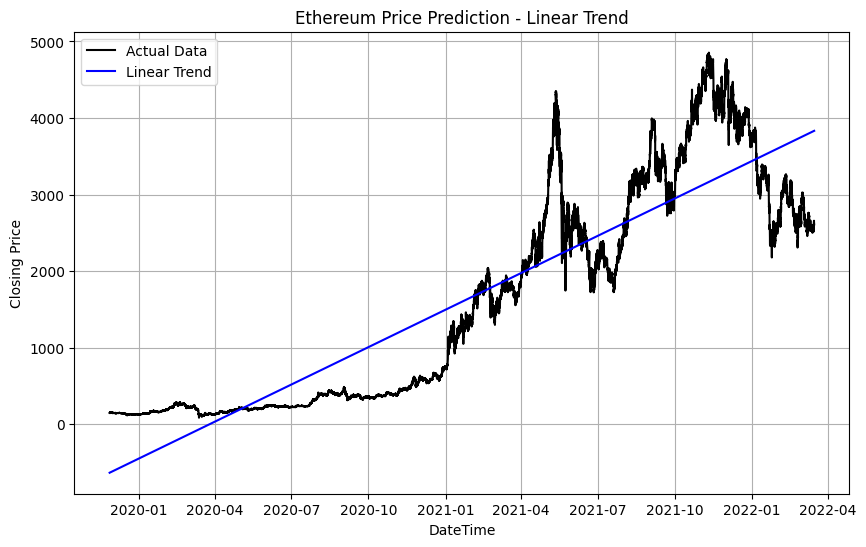

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual Data', color='black')
plt.plot(data.index, y_linear_predict, label='Linear Trend', color='blue')
plt.title('Ethereum Price Prediction - Linear Trend')
plt.xlabel('DateTime')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print(f"Linear Trend Equation: y = {regressor.coef_[0]:.2f} * x + {regressor.intercept_:.2f}")


Linear Trend Equation: y = 0.06 * x + -631.58


### B - POLYNOMIAL TREND ESTIMATION ###


In [10]:
degree = 2
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_predict_poly_2 = regressor_poly.predict(X_poly)

In [11]:
degree_3 = 3
poly_reg_3 = PolynomialFeatures(degree=degree_3)
X_poly_3 = poly_reg_3.fit_transform(X)
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)
y_predict_poly_3 = regressor_poly_3.predict(X_poly_3)

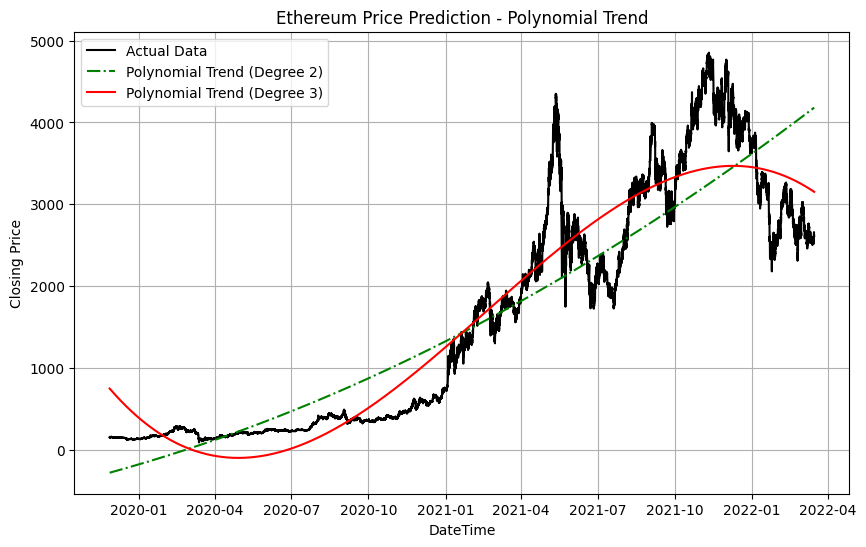

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual Data', color='black')
plt.plot(data.index, y_predict_poly_2, label=f'Polynomial Trend (Degree {degree})', linestyle='-.', color='green')
plt.plot(data.index, y_predict_poly_3, label=f'Polynomial Trend (Degree {degree_3})', color='red')
plt.title('Ethereum Price Prediction - Polynomial Trend')
plt.xlabel('DateTime')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
print("Polynomial Trend Equation (Degree 2): y = {:.2f} * x^2 + {:.2f} * x + {:.2f}".format(
    regressor_poly.coef_[2], regressor_poly.coef_[1], regressor_poly.intercept_))

Polynomial Trend Equation (Degree 2): y = 0.00 * x^2 + 0.03 * x + -283.25


In [14]:

print("Polynomial Trend Equation (Degree 3): y = {:.2f} * x^3 + {:.2f} * x^2 + {:.2f} * x + {:.2f}".format(
    regressor_poly_3.coef_[3], regressor_poly_3.coef_[2], regressor_poly_3.coef_[1], regressor_poly_3.intercept_))

Polynomial Trend Equation (Degree 3): y = -0.00 * x^3 + 0.00 * x^2 + -0.12 * x + 746.35
